In [3]:
"""
Homogeneous Coordinates - Building Practical Intuition
====================================================

GOAL: Understand WHY homogeneous coordinates exist and HOW they solve real problems
KEY INSIGHT: They're not abstract math - they're a practical solution to geometric limitations!

LEARNING PATH:
1. See the problem with normal coordinates
2. Discover how homogeneous coordinates solve it
3. Build intuition through visual examples
4. Connect to real computer vision applications
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow
import matplotlib.patches as patches

In [1]:
def demonstrate_parallel_lines_problem():
    """Show why parallel lines can't meet in normal coordinate system"""
    
    print("🚨 THE PROBLEM: Parallel Lines Can't Meet!")
    print("=" * 50)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left plot: Parallel lines in normal coordinates
    ax1 = axes[0]
    x = np.linspace(-5, 5, 100)
    
    # Draw parallel lines
    y1 = 2 + 0 * x  # y = 2 (horizontal line)
    y2 = -1 + 0 * x  # y = -1 (horizontal line)
    
    ax1.plot(x, y1, 'b-', linewidth=2, label='Line 1: y = 2')
    ax1.plot(x, y2, 'r-', linewidth=2, label='Line 2: y = -1')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-3, 4)
    ax1.grid(True)
    ax1.legend()
    ax1.set_title('Problem: Parallel Lines Never Meet\n(In Normal 2D Coordinates)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    # Right plot: What we see in perspective
    ax2 = axes[1]
    
    # Simulate perspective view of parallel lines (like railroad tracks)
    x_persp = np.linspace(0, 10, 100)
    # Lines converge as x increases (distance effect)
    y1_persp = 1 - 0.8 * x_persp / 10  # Upper line converges down
    y2_persp = -1 + 0.8 * x_persp / 10  # Lower line converges up
    
    ax2.plot(x_persp, y1_persp, 'b-', linewidth=2, label='Upper track')
    ax2.plot(x_persp, y2_persp, 'r-', linewidth=2, label='Lower track')
    ax2.set_xlim(0, 10)
    ax2.set_ylim(-2, 2)
    ax2.grid(True)
    ax2.legend()
    ax2.set_title('Reality: Parallel Lines DO Meet\n(In Perspective View)')
    ax2.set_xlabel('Distance →')
    ax2.set_ylabel('Apparent Height')
    
    # Mark the meeting point
    ax2.plot(10, 0.2, 'ko', markersize=8, label='Meeting Point')
    ax2.annotate('Lines meet here!', xy=(10, 0.2), xytext=(8, 1),
                arrowprops=dict(arrowstyle='->', color='black'),
                fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 THE CORE PROBLEM:")
    print("• In normal (x,y) coordinates: Parallel lines NEVER intersect")
    print("• In visual reality: Parallel lines DO meet at vanishing points")
    print("• This mismatch breaks our mathematical models!")
    print("\n💡 WE NEED: A coordinate system where parallel lines CAN meet")

🚨 THE PROBLEM: Parallel Lines Can't Meet!


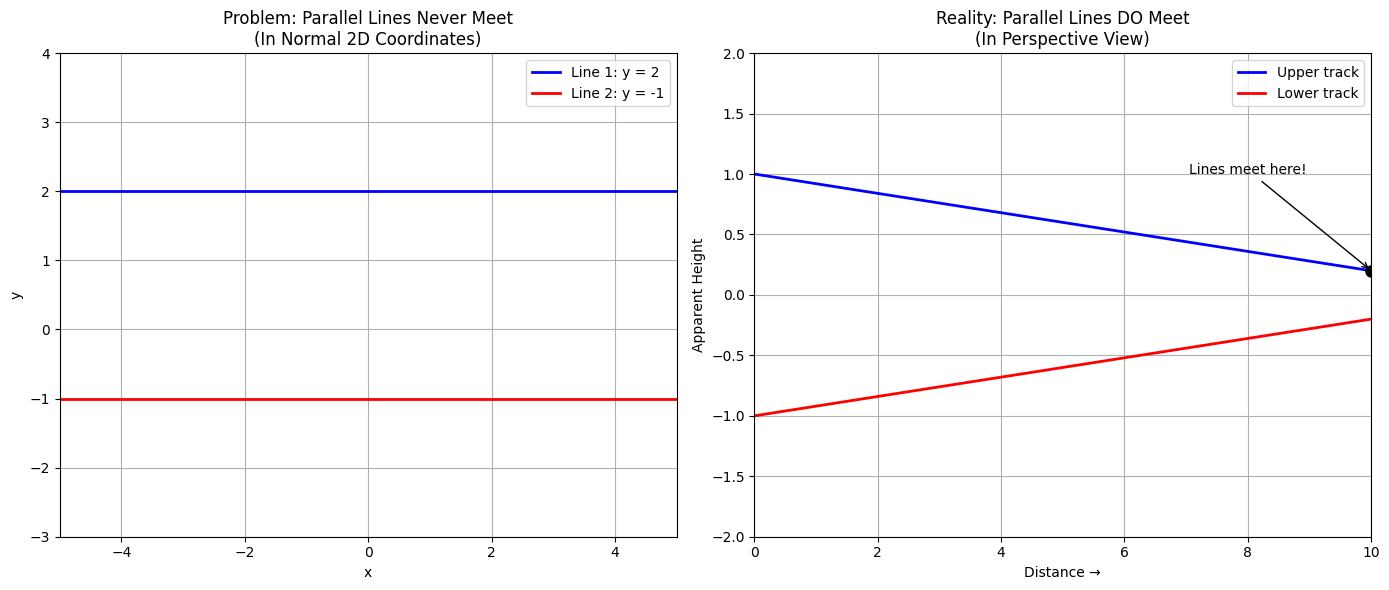

🔍 THE CORE PROBLEM:
• In normal (x,y) coordinates: Parallel lines NEVER intersect
• In visual reality: Parallel lines DO meet at vanishing points
• This mismatch breaks our mathematical models!

💡 WE NEED: A coordinate system where parallel lines CAN meet


In [4]:
demonstrate_parallel_lines_problem()

In [5]:
def demonstrate_division_by_zero_problem():
    """Show the infinity problem in transformations"""
    
    print("\n🚨 ANOTHER PROBLEM: Division by Zero!")
    print("=" * 50)
    
    # Example: Perspective projection formula
    print("📷 CAMERA PROJECTION FORMULA:")
    print("For a 3D point (X, Y, Z), the 2D image coordinates are:")
    print("x = f * X/Z")
    print("y = f * Y/Z")
    print("where f = focal length, Z = distance from camera")
    
    print("\n❌ WHAT GOES WRONG:")
    
    # Simulate points at different distances
    f = 100  # focal length
    X, Y = 50, 30  # 3D point coordinates
    
    distances = [10, 5, 2, 1, 0.1, 0.01]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show how projection coordinates change
    x_proj = []
    y_proj = []
    
    for Z in distances:
        x = f * X / Z
        y = f * Y / Z
        x_proj.append(x)
        y_proj.append(y)
        print(f"Distance Z={Z:4.2f}: Image point = ({x:6.1f}, {y:6.1f})")
    
    ax1.plot(distances, x_proj, 'bo-', label='x coordinate')
    ax1.plot(distances, y_proj, 'ro-', label='y coordinate')
    ax1.set_xlabel('Distance from Camera (Z)')
    ax1.set_ylabel('Image Coordinate')
    ax1.set_title('Problem: Coordinates Explode as Z→0')
    ax1.legend()
    ax1.grid(True)
    ax1.set_ylim(0, 1000)
    
    # Show the "infinity" problem
    Z_fine = np.linspace(0.01, 2, 100)
    x_fine = f * X / Z_fine
    
    ax2.plot(Z_fine, x_fine, 'b-', linewidth=2)
    ax2.set_xlabel('Distance from Camera (Z)')
    ax2.set_ylabel('x coordinate')
    ax2.set_title('As Distance → 0, Coordinates → ∞')
    ax2.grid(True)
    ax2.set_ylim(0, 2000)
    
    plt.tight_layout()
    plt.show()
    
    print("\n❌ PROBLEMS:")
    print("• When Z approaches 0, coordinates become infinite")
    print("• Cannot represent points 'at infinity'")
    print("• Computer calculations break down")
    print("\n💡 WE NEED: A way to handle infinity gracefully")


🚨 ANOTHER PROBLEM: Division by Zero!
📷 CAMERA PROJECTION FORMULA:
For a 3D point (X, Y, Z), the 2D image coordinates are:
x = f * X/Z
y = f * Y/Z
where f = focal length, Z = distance from camera

❌ WHAT GOES WRONG:
Distance Z=10.00: Image point = ( 500.0,  300.0)
Distance Z=5.00: Image point = (1000.0,  600.0)
Distance Z=2.00: Image point = (2500.0, 1500.0)
Distance Z=1.00: Image point = (5000.0, 3000.0)
Distance Z=0.10: Image point = (50000.0, 30000.0)
Distance Z=0.01: Image point = (500000.0, 300000.0)


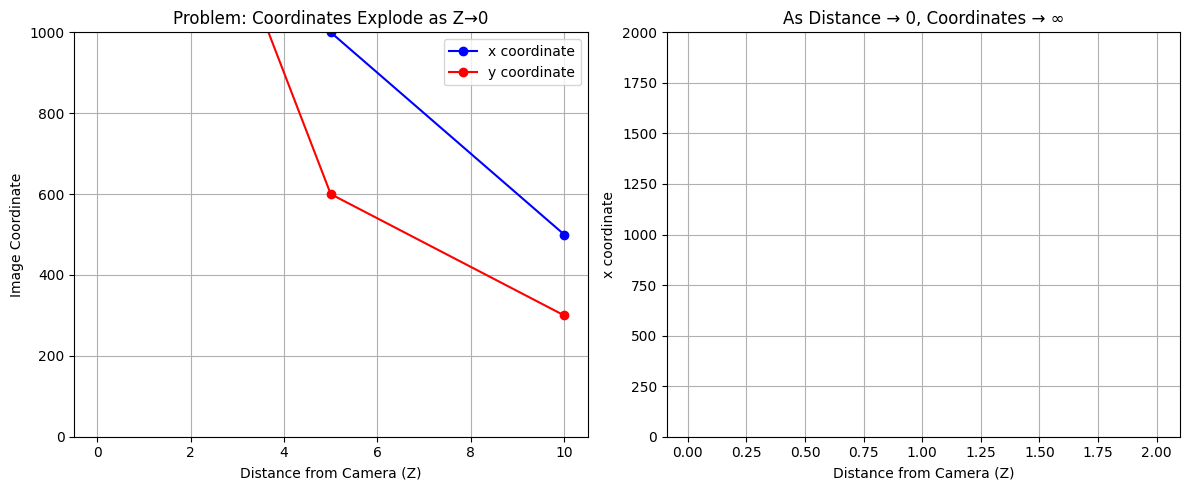


❌ PROBLEMS:
• When Z approaches 0, coordinates become infinite
• Cannot represent points 'at infinity'
• Computer calculations break down

💡 WE NEED: A way to handle infinity gracefully


In [6]:
demonstrate_division_by_zero_problem()

In [7]:
# ============================================================================
# STEP 2: THE SOLUTION - How Homogeneous Coordinates Work
# ============================================================================

def introduce_homogeneous_coordinates():
    """Show the elegant solution"""
    
    print("\n✨ THE SOLUTION: Homogeneous Coordinates!")
    print("=" * 50)
    
    print("🎯 KEY INSIGHT: Add one more dimension to handle infinity!")
    print()
    print("NORMAL COORDINATES → HOMOGENEOUS COORDINATES")
    print("2D point (x, y)  →  3D point (X, Y, W)")
    print("3D point (x,y,z) →  4D point (X, Y, Z, W)")
    print()
    print("🔑 THE MAGIC FORMULA:")
    print("   x = X/W")
    print("   y = Y/W")
    print("   (and z = Z/W for 3D)")
    
    # Demonstrate multiple representations
    print("\n📊 MULTIPLE REPRESENTATIONS OF SAME POINT:")
    
    # Same 2D point in different homogeneous forms
    representations = [
        ([2, 3, 1], "Standard form"),
        ([4, 6, 2], "Scaled by 2"),
        ([10, 15, 5], "Scaled by 5"),
        ([1, 1.5, 0.5], "Scaled by 0.5"),
    ]
    
    for (X, Y, W), description in representations:
        x, y = X/W, Y/W
        print(f"({X:4.1f}, {Y:4.1f}, {W:4.1f}) → ({x:.1f}, {y:.1f})  [{description}]")
    
    print("\n🎉 THEY ALL REPRESENT THE SAME POINT: (2, 3)")
    print("This is called 'projective equivalence'")


In [8]:
introduce_homogeneous_coordinates()


✨ THE SOLUTION: Homogeneous Coordinates!
🎯 KEY INSIGHT: Add one more dimension to handle infinity!

NORMAL COORDINATES → HOMOGENEOUS COORDINATES
2D point (x, y)  →  3D point (X, Y, W)
3D point (x,y,z) →  4D point (X, Y, Z, W)

🔑 THE MAGIC FORMULA:
   x = X/W
   y = Y/W
   (and z = Z/W for 3D)

📊 MULTIPLE REPRESENTATIONS OF SAME POINT:
( 2.0,  3.0,  1.0) → (2.0, 3.0)  [Standard form]
( 4.0,  6.0,  2.0) → (2.0, 3.0)  [Scaled by 2]
(10.0, 15.0,  5.0) → (2.0, 3.0)  [Scaled by 5]
( 1.0,  1.5,  0.5) → (2.0, 3.0)  [Scaled by 0.5]

🎉 THEY ALL REPRESENT THE SAME POINT: (2, 3)
This is called 'projective equivalence'


In [9]:

def demonstrate_infinity_handling():
    """Show how homogeneous coordinates handle infinity"""
    
    print("\n🌟 HANDLING INFINITY GRACEFULLY")
    print("=" * 50)
    
    print("🔮 POINTS AT INFINITY: When W = 0")
    print()
    
    # Examples of points at infinity
    infinity_points = [
        ([1, 0, 0], "Point at infinity in x direction"),
        ([0, 1, 0], "Point at infinity in y direction"),
        ([1, 1, 0], "Point at infinity in diagonal direction"),
        ([3, -2, 0], "Point at infinity in direction (3,-2)"),
    ]
    
    for (X, Y, W), description in infinity_points:
        print(f"({X:2d}, {Y:2d}, {W:1d}) → {description}")
    
    # Visualize infinity points
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Draw normal points
    normal_points = [(2, 3), (4, 1), (-2, 2), (1, -1)]
    for i, (x, y) in enumerate(normal_points):
        ax.plot(x, y, 'bo', markersize=8)
        ax.annotate(f'({x},{y})', (x, y), xytext=(5, 5), 
                   textcoords='offset points', fontsize=10)
    
    # Draw directions to infinity
    infinity_directions = [(1, 0), (0, 1), (1, 1), (3, -2)]
    colors = ['red', 'green', 'purple', 'orange']
    
    for i, ((dx, dy), color) in enumerate(zip(infinity_directions, colors)):
        # Draw arrow showing direction to infinity
        ax.arrow(0, 0, dx*3, dy*3, head_width=0.2, head_length=0.3, 
                fc=color, ec=color, linewidth=2, alpha=0.7)
        
        # Label the infinity point
        ax.annotate(f'({dx},{dy},0)\n"Point at ∞"', 
                   (dx*3.5, dy*3.5), fontsize=9, color=color, 
                   ha='center', va='center', weight='bold')
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True)
    ax.set_title('Homogeneous Coordinates: Normal Points + Points at Infinity')
    ax.set_xlabel('x direction')
    ax.set_ylabel('y direction')
    
    # Draw the origin
    ax.plot(0, 0, 'ko', markersize=6)
    ax.annotate('Origin (0,0)', (0, 0), xytext=(-30, 20), 
               textcoords='offset points', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 BRILLIANT INSIGHT:")
    print("• Normal points: W ≠ 0, can compute x = X/W, y = Y/W")
    print("• Points at infinity: W = 0, represent directions, not locations")
    print("• All points (finite + infinite) handled in one unified system!")


🌟 HANDLING INFINITY GRACEFULLY
🔮 POINTS AT INFINITY: When W = 0

( 1,  0, 0) → Point at infinity in x direction
( 0,  1, 0) → Point at infinity in y direction
( 1,  1, 0) → Point at infinity in diagonal direction
( 3, -2, 0) → Point at infinity in direction (3,-2)


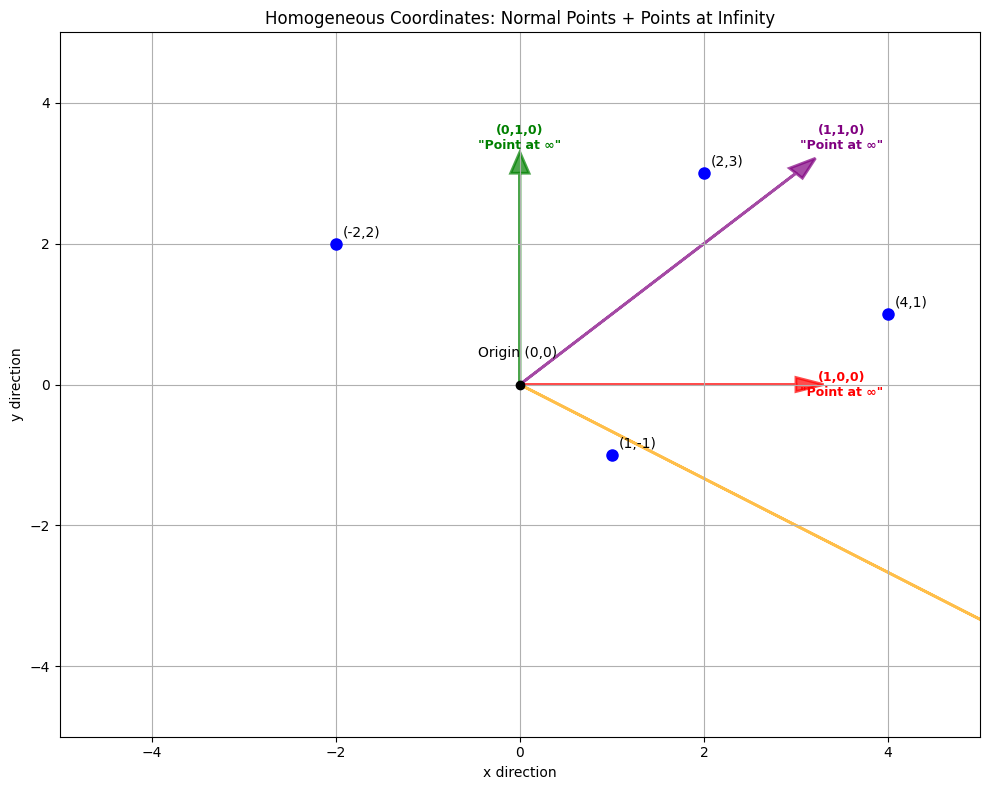


💡 BRILLIANT INSIGHT:
• Normal points: W ≠ 0, can compute x = X/W, y = Y/W
• Points at infinity: W = 0, represent directions, not locations
• All points (finite + infinite) handled in one unified system!


In [10]:
demonstrate_infinity_handling()

In [11]:
# ============================================================================
# STEP 3: PRACTICAL EXAMPLES - See Them in Action
# ============================================================================

def parallel_lines_intersection():
    """Show how parallel lines intersect at infinity"""
    
    print("\n🛤️ PARALLEL LINES FINALLY MEET!")
    print("=" * 50)
    
    print("🚂 EXAMPLE: Railroad Track Problem")
    print()
    
    # Define two parallel lines in homogeneous coordinates
    # Line 1: y = 2 → 0x + 1y - 2 = 0 → [0, 1, -2]
    # Line 2: y = -1 → 0x + 1y + 1 = 0 → [0, 1, 1]
    
    line1 = np.array([0, 1, -2])  # y = 2
    line2 = np.array([0, 1, 1])   # y = -1
    
    print("Line 1 (y = 2): [0, 1, -2]")
    print("Line 2 (y = -1): [0, 1, 1]")
    print()
    
    # Find intersection using cross product
    intersection = np.cross(line1, line2)
    print(f"Intersection point: {intersection}")
    print(f"In homogeneous form: ({intersection[0]}, {intersection[1]}, {intersection[2]})")
    
    # Check if W = 0 (point at infinity)
    if abs(intersection[2]) < 1e-10:
        print("✨ W = 0, so this is a POINT AT INFINITY!")
        print(f"Direction: ({intersection[0]}, {intersection[1]})")
        print("This means the lines meet in the 'x direction' at infinity")
    else:
        x = intersection[0] / intersection[2]
        y = intersection[1] / intersection[2]
        print(f"Regular intersection at: ({x:.2f}, {y:.2f})")
    
    # Visualize
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Draw the parallel lines
    x = np.linspace(-5, 5, 100)
    y1 = 2 + 0*x
    y2 = -1 + 0*x
    
    ax.plot(x, y1, 'b-', linewidth=3, label='Line 1: y = 2')
    ax.plot(x, y2, 'r-', linewidth=3, label='Line 2: y = -1')
    
    # Show they meet at infinity in x direction
    ax.arrow(4, 2, 1, 0, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
    ax.arrow(4, -1, 1, 0, head_width=0.1, head_length=0.2, fc='red', ec='red')
    ax.annotate('Both lines extend to\ninfinity in x direction', 
               xy=(4.5, 0.5), fontsize=12, ha='center',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-2, 3)
    ax.grid(True)
    ax.legend()
    ax.set_title('Parallel Lines Meet at Infinity: [1, 0, 0]')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 KEY INSIGHT:")
    print("• In normal coordinates: These lines never meet")
    print("• In homogeneous coordinates: They meet at [1, 0, 0]")
    print("• This point represents 'infinity in the x direction'")
    print("• Perfect for modeling vanishing points in perspective!")



🛤️ PARALLEL LINES FINALLY MEET!
🚂 EXAMPLE: Railroad Track Problem

Line 1 (y = 2): [0, 1, -2]
Line 2 (y = -1): [0, 1, 1]

Intersection point: [3 0 0]
In homogeneous form: (3, 0, 0)
✨ W = 0, so this is a POINT AT INFINITY!
Direction: (3, 0)
This means the lines meet in the 'x direction' at infinity


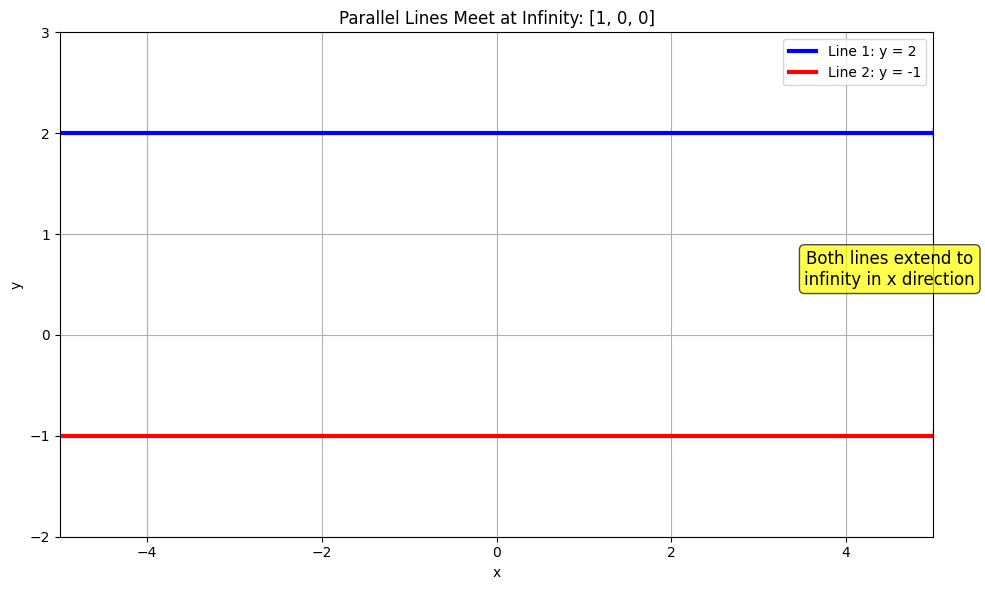


🎯 KEY INSIGHT:
• In normal coordinates: These lines never meet
• In homogeneous coordinates: They meet at [1, 0, 0]
• This point represents 'infinity in the x direction'
• Perfect for modeling vanishing points in perspective!


In [12]:
parallel_lines_intersection()

In [13]:
def transformation_magic():
    """Show how homogeneous coordinates make transformations elegant"""
    
    print("\n⚡ TRANSFORMATION MAGIC!")
    print("=" * 50)
    
    print("🎭 HOMOGENEOUS COORDINATES MAKE ALL TRANSFORMATIONS LINEAR!")
    print()
    
    # Define a point
    point_2d = np.array([3, 2])
    point_homo = np.array([3, 2, 1])  # Homogeneous version
    
    print(f"Original point: {point_2d} → Homogeneous: {point_homo}")
    print()
    
    # Define transformations
    transformations = {
        "Translation by (1, 2)": np.array([
            [1, 0, 1],
            [0, 1, 2],
            [0, 0, 1]
        ]),
        
        "Rotation by 45°": np.array([
            [0.707, -0.707, 0],
            [0.707,  0.707, 0],
            [0,      0,     1]
        ]),
        
        "Scaling by 2x": np.array([
            [2, 0, 0],
            [0, 2, 0],
            [0, 0, 1]
        ]),
        
        "Shearing": np.array([
            [1, 0.5, 0],
            [0, 1,   0],
            [0, 0,   1]
        ])
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    # Original point
    for i, ax in enumerate(axes):
        ax.plot(point_2d[0], point_2d[1], 'bo', markersize=10, label='Original')
        ax.grid(True)
        ax.set_xlim(-1, 8)
        ax.set_ylim(-1, 8)
        ax.set_aspect('equal')
    
    for i, (name, T) in enumerate(transformations.items()):
        # Apply transformation
        transformed_homo = T @ point_homo
        
        # Convert back to 2D
        transformed_2d = transformed_homo[:2] / transformed_homo[2]
        
        print(f"{name}:")
        print(f"  Matrix × {point_homo} = {transformed_homo}")
        print(f"  Result: {transformed_2d}")
        print()
        
        # Plot
        ax = axes[i]
        ax.plot(transformed_2d[0], transformed_2d[1], 'ro', markersize=10, label='Transformed')
        ax.arrow(point_2d[0], point_2d[1], 
                transformed_2d[0] - point_2d[0], 
                transformed_2d[1] - point_2d[1],
                head_width=0.2, head_length=0.2, fc='green', ec='green')
        ax.set_title(name)
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("🌟 THE MAGIC:")
    print("• ALL transformations become simple matrix multiplication!")
    print("• Translation (previously special) now works like rotation/scaling")
    print("• Can combine any transformations by multiplying matrices")
    print("• Perspective projection becomes linear transformation!")



⚡ TRANSFORMATION MAGIC!
🎭 HOMOGENEOUS COORDINATES MAKE ALL TRANSFORMATIONS LINEAR!

Original point: [3 2] → Homogeneous: [3 2 1]

Translation by (1, 2):
  Matrix × [3 2 1] = [4 4 1]
  Result: [4. 4.]

Rotation by 45°:
  Matrix × [3 2 1] = [0.707 3.535 1.   ]
  Result: [0.707 3.535]

Scaling by 2x:
  Matrix × [3 2 1] = [6 4 1]
  Result: [6. 4.]

Shearing:
  Matrix × [3 2 1] = [4. 2. 1.]
  Result: [4. 2.]



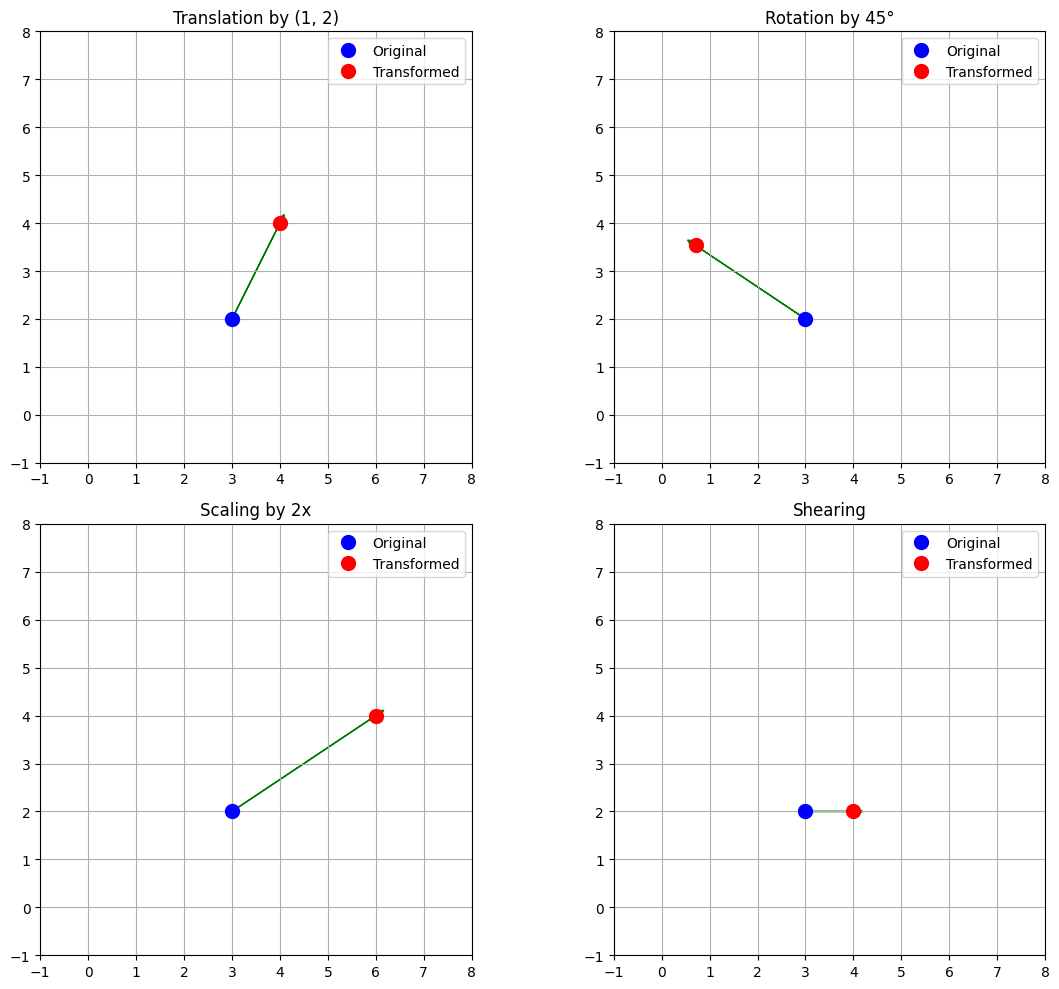

🌟 THE MAGIC:
• ALL transformations become simple matrix multiplication!
• Translation (previously special) now works like rotation/scaling
• Can combine any transformations by multiplying matrices
• Perspective projection becomes linear transformation!


In [14]:
transformation_magic()

In [15]:
# ============================================================================
# STEP 4: REAL COMPUTER VISION APPLICATIONS
# ============================================================================

def real_world_applications():
    """Show practical CV applications"""
    
    print("\n🌍 REAL-WORLD COMPUTER VISION APPLICATIONS")
    print("=" * 50)
    
    print("📸 1. CAMERA PROJECTION")
    print("3D world point → 2D image point")
    print()
    
    # Camera projection example
    print("CAMERA MATRIX (homogeneous form):")
    K = np.array([
        [800, 0, 320],  # fx, skew, cx
        [0, 800, 240],  # 0, fy, cy  
        [0, 0, 1]       # 0, 0, 1
    ])
    print(K)
    print()
    
    # Project 3D point
    point_3d_homo = np.array([2, 3, 5, 1])  # 3D point in homogeneous coordinates
    print(f"3D point: {point_3d_homo[:3]} (in homogeneous: {point_3d_homo})")
    
    # Create full projection matrix (assuming camera at origin)
    P = np.hstack([K, np.zeros((3, 1))])  # [K | 0] for camera at origin
    print(f"Projection matrix P:")
    print(P)
    
    # Project to image
    image_point_homo = P @ point_3d_homo
    image_point_2d = image_point_homo[:2] / image_point_homo[2]
    
    print(f"Projected image point: {image_point_2d}")
    print()
    
    print("🎯 2. VANISHING POINTS")
    print("Parallel lines in 3D → Meet at vanishing point in image")
    print()
    
    # Example: vertical lines in 3D
    print("Vertical lines in 3D world (parallel to y-axis):")
    line1_3d = np.array([1, 0, 5, 1])  # Point on line 1
    line2_3d = np.array([3, 0, 5, 1])  # Point on line 2
    direction = np.array([0, 1, 0, 0])  # Vertical direction
    
    # Project direction to image
    vanishing_point_homo = P @ direction
    print(f"Direction vector: {direction[:3]}")
    print(f"Vanishing point (homogeneous): {vanishing_point_homo}")
    
    if abs(vanishing_point_homo[2]) > 1e-10:
        vp_2d = vanishing_point_homo[:2] / vanishing_point_homo[2]
        print(f"Vanishing point in image: {vp_2d}")
    else:
        print("Vanishing point at infinity in image plane")
    
    print()
    print("🔧 3. HOMOGRAPHY ESTIMATION")
    print("Map rectangular document → corrected rectangle")
    print()
    print("Problem: Document appears as quadrilateral in photo")
    print("Solution: Find homography H that maps corners correctly")
    print("H × [distorted_corner] = [corrected_corner]")
    print()
    
    print("📱 4. AUGMENTED REALITY")
    print("Place virtual objects in real scenes")
    print("• Track features in homogeneous coordinates")
    print("• Handle points going to infinity gracefully")
    print("• Compose transformations with matrix multiplication")

In [16]:
real_world_applications()


🌍 REAL-WORLD COMPUTER VISION APPLICATIONS
📸 1. CAMERA PROJECTION
3D world point → 2D image point

CAMERA MATRIX (homogeneous form):
[[800   0 320]
 [  0 800 240]
 [  0   0   1]]

3D point: [2 3 5] (in homogeneous: [2 3 5 1])
Projection matrix P:
[[800.   0. 320.   0.]
 [  0. 800. 240.   0.]
 [  0.   0.   1.   0.]]
Projected image point: [640. 720.]

🎯 2. VANISHING POINTS
Parallel lines in 3D → Meet at vanishing point in image

Vertical lines in 3D world (parallel to y-axis):
Direction vector: [0 1 0]
Vanishing point (homogeneous): [  0. 800.   0.]
Vanishing point at infinity in image plane

🔧 3. HOMOGRAPHY ESTIMATION
Map rectangular document → corrected rectangle

Problem: Document appears as quadrilateral in photo
Solution: Find homography H that maps corners correctly
H × [distorted_corner] = [corrected_corner]

📱 4. AUGMENTED REALITY
Place virtual objects in real scenes
• Track features in homogeneous coordinates
• Handle points going to infinity gracefully
• Compose transformation

In [17]:

def practical_exercises():
    """Hands-on exercises to build intuition"""
    
    print("\n🏋️ PRACTICAL EXERCISES TO BUILD INTUITION")
    print("=" * 50)
    
    print("✋ EXERCISE 1: Convert Between Coordinate Systems")
    print()
    
    # Give some 2D points to convert
    points_2d = [(3, 4), (-2, 1), (0, 5)]
    
    print("Convert these 2D points to homogeneous coordinates:")
    for point in points_2d:
        homo = [point[0], point[1], 1]
        print(f"  {point} → {homo}")
    
    print()
    print("Convert these homogeneous points back to 2D:")
    points_homo = [(6, 8, 2), (-4, 2, 2), (0, 0, 1), (1, 2, 0)]
    
    for point in points_homo:
        if point[2] != 0:
            back_2d = (point[0]/point[2], point[1]/point[2])
            print(f"  {point} → {back_2d}")
        else:
            print(f"  {point} → Point at infinity in direction ({point[0]}, {point[1]})")
    
    print()
    print("🎯 EXERCISE 2: Find Where Lines Meet")
    print()
    print("Find intersection of these lines using cross product:")
    print("Line 1: x + y - 3 = 0  →  [1, 1, -3]")
    print("Line 2: 2x - y + 1 = 0  →  [2, -1, 1]")
    
    line1 = np.array([1, 1, -3])
    line2 = np.array([2, -1, 1])
    intersection = np.cross(line1, line2)
    
    print(f"Intersection: {intersection}")
    if intersection[2] != 0:
        x = intersection[0] / intersection[2]
        y = intersection[1] / intersection[2]
        print(f"In 2D coordinates: ({x:.2f}, {y:.2f})")
    
    print()
    print("🚀 EXERCISE 3: Apply Transformation")
    print()
    print("Apply this transformation to point [2, 3, 1]:")
    
    T = np.array([
        [2, 0, 1],
        [0, 2, 2],
        [0, 0, 1]
    ])
    
    point = np.array([2, 3, 1])
    result = T @ point
    
    print("Transformation matrix:")
    print(T)
    print(f"Result: {result}")
    print(f"In 2D: ({result[0]/result[2]:.1f}, {result[1]/result[2]:.1f})")
    print("This is: scale by 2x + translate by (1,2)")


In [18]:
practical_exercises()


🏋️ PRACTICAL EXERCISES TO BUILD INTUITION
✋ EXERCISE 1: Convert Between Coordinate Systems

Convert these 2D points to homogeneous coordinates:
  (3, 4) → [3, 4, 1]
  (-2, 1) → [-2, 1, 1]
  (0, 5) → [0, 5, 1]

Convert these homogeneous points back to 2D:
  (6, 8, 2) → (3.0, 4.0)
  (-4, 2, 2) → (-2.0, 1.0)
  (0, 0, 1) → (0.0, 0.0)
  (1, 2, 0) → Point at infinity in direction (1, 2)

🎯 EXERCISE 2: Find Where Lines Meet

Find intersection of these lines using cross product:
Line 1: x + y - 3 = 0  →  [1, 1, -3]
Line 2: 2x - y + 1 = 0  →  [2, -1, 1]
Intersection: [-2 -7 -3]
In 2D coordinates: (0.67, 2.33)

🚀 EXERCISE 3: Apply Transformation

Apply this transformation to point [2, 3, 1]:
Transformation matrix:
[[2 0 1]
 [0 2 2]
 [0 0 1]]
Result: [5 8 1]
In 2D: (5.0, 8.0)
This is: scale by 2x + translate by (1,2)
